In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
import numpy as np

In [19]:
# 讀取數據集
file_path = 'train_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# 處理離群值（例如使用四分位距法）
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

df_no_outliers = remove_outliers(df)

特徵 NOX 的偏度: 0.9406670353744817
使用的方法: 平方根轉換


C:\Users\user\AppData\Local\Temp\ipykernel_6476\2539832129.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[feature] = np.sqrt(df_no_outliers[feature])
c:\Users\user\miniconda3\envs\venv1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\venv1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\venv1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from cu

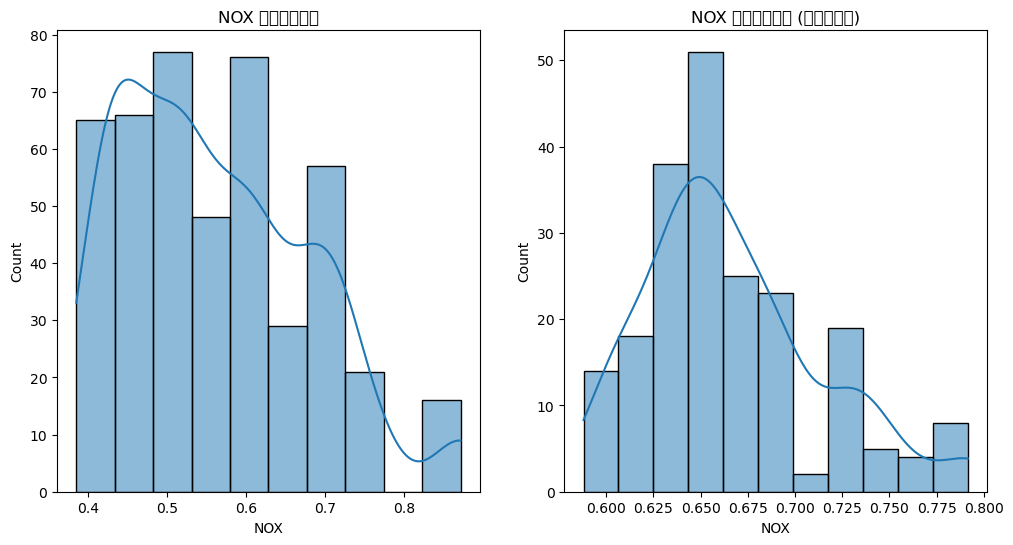

In [26]:
# 選擇特徵
feature = 'NOX'  # 替換為你要處理的特徵名稱

# 計算偏度
skewness = skew(df_no_outliers[feature].dropna())
print(f"特徵 {feature} 的偏度: {skewness}")

# 根據偏度選擇適當的修正方法
if skewness > 1:
    if (df_no_outliers[feature] > 0).all():
        # 對數轉換
        df_no_outliers[feature] = np.log1p(df_no_outliers[feature])
        method = '對數轉換'
    else:
        # 立方根轉換
        df_no_outliers[feature] = np.cbrt(df_no_outliers[feature])
        method = '立方根轉換'
elif 0.5 < skewness <= 1:
    if (df_no_outliers[feature] >= 0).all():
        # 平方根轉換
        df_no_outliers[feature] = np.sqrt(df_no_outliers[feature])
        method = '平方根轉換'
    else:
        # 立方根轉換
        df_no_outliers[feature] = np.cbrt(df_no_outliers[feature])
        method = '立方根轉換'
else:
    # Box-Cox 轉換
    df_no_outliers[feature], _ = boxcox(df_no_outliers[feature] + 1)
    method = 'Box-Cox 轉換'

print(f"使用的方法: {method}")

# 顯示修正前後的分佈圖
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[feature], kde=True)
plt.title(f'{feature} 修正前的分佈')

plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers[feature], kde=True)
plt.title(f'{feature} 修正後的分佈 ({method})')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12952\1671032394.py:27: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.savefig(output_image_path)
C:\Users\user\AppData\Local\Temp\ipykernel_12952\1671032394.py:27: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.savefig(output_image_path)
C:\Users\user\AppData\Local\Temp\ipykernel_12952\1671032394.py:27: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.savefig(output_image_path)
C:\Users\user\AppData\Local\Temp\ipykernel_12952\1671032394.py:27: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.savefig(output_image_path)
C:\Users\user\AppData\Local\Temp\ipykernel_12952\1671032394.py:27: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.savefig(output_image_path)
C:\Users\user\AppData\Local\Temp\ipykern

'output_adjusted.png'

c:\Users\user\miniconda3\envs\venv2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\venv2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\venv2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\venv2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\miniconda3\envs\venv2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK U

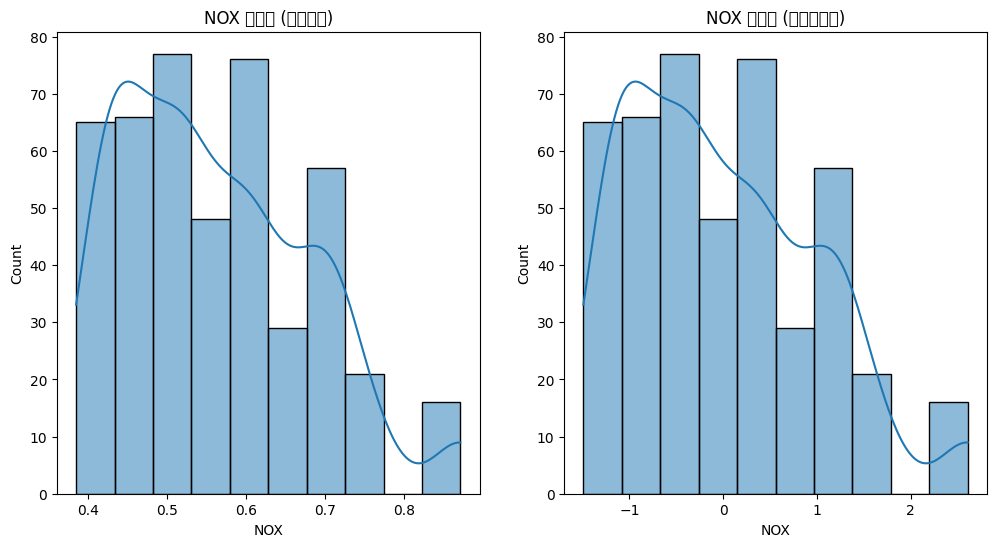

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 讀取數據集
df = pd.read_csv('train_dataset.csv')

# 創建 NOX 分佈圖的畫布
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# NOX (原始數據)
sns.histplot(df['NOX'], kde=True, ax=axes[0])
axes[0].set_title('NOX 分佈圖 (原始數據)')
axes[0].set_xlabel('NOX')
axes[0].set_ylabel('Count')

# NOX (標準化數據)
nox_standardized = (df['NOX'] - df['NOX'].mean()) / df['NOX'].std()
sns.histplot(nox_standardized, kde=True, ax=axes[1])
axes[1].set_title('NOX 分佈圖 (標準化數據)')
axes[1].set_xlabel('NOX')
axes[1].set_ylabel('Count')

# 保存圖像到當前工作目錄
output_image_path = 'output_adjusted.png'
plt.savefig(output_image_path)

output_image_path
